# Importing Neccessary Libraries

In [1]:
import keras
from keras import Input
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Reading the Dataset

In [4]:
df = pd.read_csv('./train.csv')

In [5]:
# Taking 30 percentage of the dataset for this project as using whole dataset crashes the memory threshold of kaggle kernels
#df = df.head(2300)

In [6]:
df.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Converting the images into Numpy array to train the CNN

In [7]:
width = 350
height = 350
X = []
for i in tqdm(range(df.shape[0])):
  path = './Images/'+df['Id'][i]+'.jpg'
  img = image.load_img(path,target_size=(width,height,3))
  img = image.img_to_array(img)
  img = img/255
  X.append(img)

X = np.array(X)

100%|██████████| 7254/7254 [00:19<00:00, 381.73it/s]


In [8]:
X.shape

(7254, 350, 350, 3)

In [9]:
y = df.drop(['Id','Genre'],axis=1)
y = y.to_numpy()
y.shape

(7254, 25)

In [10]:
#x_train = independent variables to train the model
#x_test = remaining portion not used to train, used to test the accuracy of the model
#y_train = dependent variable which need to be predicted by the model
#y_test = category labels used to test the accuracy between actual and predicted categories

#test_size = 0.1 = 10% used for testing, 90% for training
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

# Preparing the model

In [11]:
model = Sequential()

#creating 2D layer with 16 windows, 3x(3x3)=9x9 pixels, relu = most common one, gives kind of yes or no but not 100% yes or no, input shape = input shape of first image in pixels

#model.add(keras.Input(shape=X_train[0].shape))
#model.add(Conv2D(16,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(16,kernel_size=(3,3),activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
#pool Conv2D Layer in neural network
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

#add next layer
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

#add next layer
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

#puts everything in 1D array
model.add(Flatten())

#add 10dim layer to the model with relu activation (negative=0, positive = linear starting (0;0))
model.add(Dense(128,activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.5))

#add 25dim layer to the model with sigmoid activation f(x) = 1/(1 + e^(-x))
model.add(Dense(25,activation='sigmoid'))

C:\Users\crist\Documents\GitHub\AI_Cat_Cris\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 348, 348, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 348, 348, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 174, 174, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 174, 174, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 172, 172, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 86, 86, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 86, 86, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 84, 84, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 112896)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,450,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,477,689 (55.23 MB)

 Trainable params: 14,477,657 (55.23 MB)

 Non-trainable params: 32 (128.00 B)

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['binary_accuracy'])

In [14]:
history = model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
204/204 ━━━━━━━━━━━━━━━━━━━━ 230s 1s/step - binary_accuracy: 0.8376 - loss: 0.8727 - val_binary_accuracy: 0.9077 - val_loss: 0.4276
Epoch 2/5
204/204 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - binary_accuracy: 0.9019 - loss: 0.2793 - val_binary_accuracy: 0.9105 - val_loss: 0.3990
Epoch 3/5
204/204 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - binary_accuracy: 0.9065 - loss: 0.2628 - val_binary_accuracy: 0.9058 - val_loss: 0.3723
Epoch 4/5
204/204 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - binary_accuracy: 0.9093 - loss: 0.2561 - val_binary_accuracy: 0.9123 - val_loss: 0.3224
Epoch 5/5
204/204 ━━━━━━━━━━━━━━━━━━━━ 218s 1s/step - binary_accuracy: 0.9114 - loss: 0.2513 - val_binary_accuracy: 0.9101 - val_loss: 0.2843


In [15]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['binary_accuracy'])
  plt.plot(epochRange,history.history['val_binary_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='best')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='best')
  plt.show()

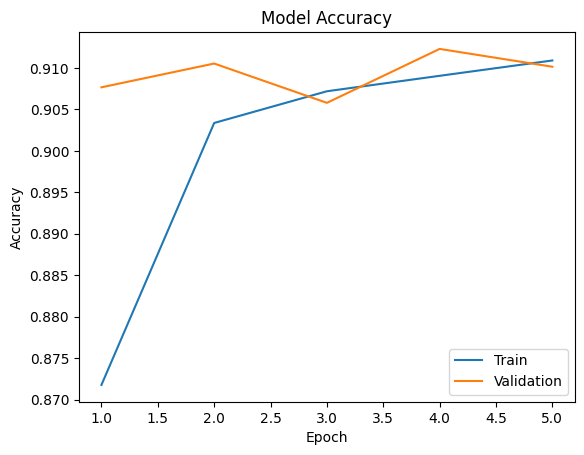

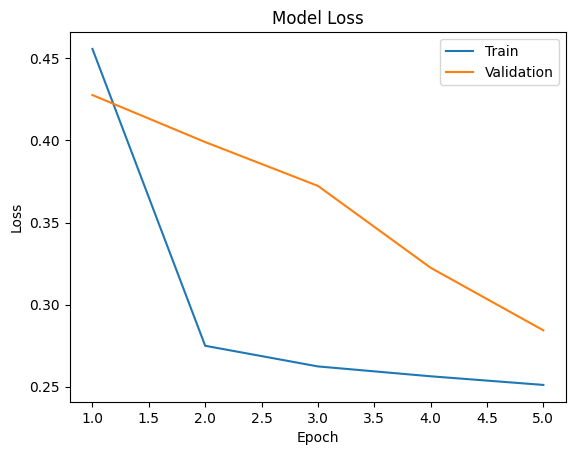

In [16]:
plotLearningCurve(history,5)

# Applying the trained model to Predict the Genre of the input image

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
[[0.20119484 0.16527449 0.0618066  0.1294867  0.51872325 0.19184275
  0.16577378 0.527391   0.1155692  0.11143152 0.06765212 0.06075736
  0.08717883 0.03460418 0.11183707 0.00498317 0.02153545 0.01410911
  0.292292   0.08993724 0.01605242 0.07392401 0.15789428 0.04502542
  0.02068919]]
Drama
Comedy
Romance


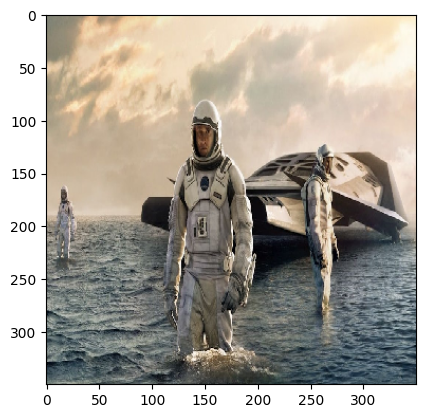

In [17]:
img = image.load_img('./interstellar.jpeg',target_size=(width,height,3))
img2 = image.load_img('./interstellar.jpeg',target_size=(width,height,3))
img3 = image.load_img('./interstellar.jpeg',target_size=(width,height,3))

img_array = [img, img2, img3]
#TODO: loop through array & get classes, add them and get the 3 most potential of it - done to increase accuracy

plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1,width,height,3)
classes = df.columns[2:]
print(classes)
y_pred = model.predict(img)
print(y_pred)
top3=np.argsort(y_pred[0])[:-4:-1]
for i in range(3):
  print(classes[top3[i]])

# As you can see from the above output Model predicted the "Drama", "Thriller" and "Action" genre of the film from the poster of the image.